In [21]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Data2 description
https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?pn=1  

this is Airline On-Time Statistics and Delay Causes from Jan, 2016 to Nov, 2016

In [22]:
# where this data came from: https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?pn=1
data2 = pd.read_csv('./project_datasets/682464398_102017_1651_airline_delay_causes.csv')

In [23]:
# data.shape

In [24]:
data2.shape

(11193, 22)

In [25]:
# data2.head()

In [9]:
# these are the variables, but its inefficient that some names have leading space, and the last columns has no infromation
data2.columns

Index([u'year', u' month', u'carrier', u'carrier_name', u'airport',
       u'airport_name', u'arr_flights', u'arr_del15', u'carrier_ct',
       u' weather_ct', u'nas_ct', u'security_ct', u'late_aircraft_ct',
       u'arr_cancelled', u'arr_diverted', u' arr_delay', u' carrier_delay',
       u'weather_delay', u'nas_delay', u'security_delay',
       u'late_aircraft_delay', u'Unnamed: 21'],
      dtype='object')

In [10]:
data2 = data2.drop('Unnamed: 21', axis=1)

In [11]:
columns = []
for i, col in enumerate(data2.columns):
    global columns
    col = re.sub(r'\s+', '', col)
    columns.append(col)

In [12]:
# fix the column index so there are no extraneous spaces... and can use bracket notation or dot notation
data2.columns = columns
data2.columns

Index([u'year', u'month', u'carrier', u'carrier_name', u'airport',
       u'airport_name', u'arr_flights', u'arr_del15', u'carrier_ct',
       u'weather_ct', u'nas_ct', u'security_ct', u'late_aircraft_ct',
       u'arr_cancelled', u'arr_diverted', u'arr_delay', u'carrier_delay',
       u'weather_delay', u'nas_delay', u'security_delay',
       u'late_aircraft_delay'],
      dtype='object')

In [13]:
data2.airport == 'DEN'

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10        True
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
11163    False
11164    False
11165    False
11166    False
11167    False
11168    False
11169    False
11170    False
11171    False
11172    False
11173    False
11174    False
11175    False
11176    False
11177    False
11178    False
11179    False
11180    False
11181    False
11182    False
11183    False
11184    False
11185    False
11186    False
11187    False
11188    False
11189    False
11190    False
11191    False
11192    False
Name: airport, Length: 11193, dtype: bool

In [15]:
data2[data2.airport == 'DEN']

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
10,2016,1,AA,American Airlines Inc.,DEN,"Denver, CO: Denver International",818.0,139.0,60.69,3.57,...,0.18,46.26,14.0,0.0,7423.0,3531.0,213.0,816.0,3.0,2860.0
142,2016,1,AS,Alaska Airlines Inc.,DEN,"Denver, CO: Denver International",120.0,15.0,3.83,0.00,...,0.00,0.89,0.0,0.0,353.0,79.0,0.0,243.0,0.0,31.0
175,2016,1,B6,JetBlue Airways,DEN,"Denver, CO: Denver International",88.0,15.0,7.81,1.46,...,0.00,3.31,2.0,0.0,826.0,315.0,160.0,151.0,0.0,200.0
259,2016,1,DL,Delta Air Lines Inc.,DEN,"Denver, CO: Denver International",610.0,86.0,35.15,5.24,...,0.00,20.09,5.0,0.0,4818.0,2222.0,572.0,880.0,0.0,1144.0
532,2016,1,F9,Frontier Airlines Inc.,DEN,"Denver, CO: Denver International",1753.0,205.0,35.71,5.54,...,0.00,97.91,11.0,1.0,13999.0,2569.0,263.0,2803.0,0.0,8364.0
603,2016,1,NK,Spirit Air Lines,DEN,"Denver, CO: Denver International",310.0,68.0,18.79,0.24,...,0.71,21.68,4.0,0.0,3015.0,861.0,4.0,910.0,12.0,1228.0
641,2016,1,OO,SkyWest Airlines Inc.,DEN,"Denver, CO: Denver International",4236.0,607.0,149.55,18.14,...,0.45,250.48,62.0,1.0,45605.0,18136.0,2601.0,7839.0,10.0,17019.0
817,2016,1,UA,United Air Lines Inc.,DEN,"Denver, CO: Denver International",4520.0,385.0,143.37,17.00,...,0.00,128.61,77.0,3.0,25553.0,10443.0,869.0,3686.0,0.0,10555.0
938,2016,1,WN,Southwest Airlines Co.,DEN,"Denver, CO: Denver International",5072.0,478.0,157.59,18.06,...,1.40,216.41,56.0,2.0,21587.0,8681.0,777.0,2370.0,22.0,9737.0
1019,2016,2,AA,American Airlines Inc.,DEN,"Denver, CO: Denver International",782.0,127.0,55.86,4.57,...,0.00,28.48,11.0,0.0,5857.0,2603.0,217.0,1217.0,0.0,1820.0


In [16]:
arr_flights_group = data2.groupby(by='carrier')['arr_flights']
arr_flights_group

In [17]:
arr_flights_sort = data2.sort_values('arr_flights', ascending=False)
arr_flights_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11193 entries, 7316 to 10994
Data columns (total 21 columns):
year                   11193 non-null int64
month                  11193 non-null int64
carrier                11193 non-null object
carrier_name           11193 non-null object
airport                11193 non-null object
airport_name           11193 non-null object
arr_flights            11175 non-null float64
arr_del15              11173 non-null float64
carrier_ct             11175 non-null float64
weather_ct             11175 non-null float64
nas_ct                 11175 non-null float64
security_ct            11175 non-null float64
late_aircraft_ct       11175 non-null float64
arr_cancelled          11175 non-null float64
arr_diverted           11175 non-null float64
arr_delay              11175 non-null float64
carrier_delay          11175 non-null float64
weather_delay          11175 non-null float64
nas_delay              11175 non-null float64
security_delay        

In [18]:
data2.arr_flights.describe()

count    11175.000000
mean       461.450470
std       1170.804175
min          1.000000
25%         60.000000
50%        133.000000
75%        343.000000
max      21977.000000
Name: arr_flights, dtype: float64

In [20]:
data2.carrier_name.value_counts()

SkyWest Airlines Inc.       2090
ExpressJet Airlines Inc.    1786
Delta Air Lines Inc.        1636
American Airlines Inc.      1011
United Air Lines Inc.        955
Southwest Airlines Co.       952
Alaska Airlines Inc.         714
JetBlue Airways              707
Frontier Airlines Inc.       551
Spirit Air Lines             375
Virgin America               229
Hawaiian Airlines Inc.       187
Name: carrier_name, dtype: int64

In [ ]:
AirTran Airways, 
Alaska Airlines, 
America West Airlines, 
American Airlines, 
ATA Airlines, 
Delta Air Lines, 
Horizon Air, 
Midwest Airlines, 
Northwest Airlines, 
US Airways, 
10

In [19]:
data2.airport_name.value_counts()

Portland, OR: Portland International                                   121
Las Vegas, NV: McCarran International                                  121
Los Angeles, CA: Los Angeles International                             121
San Diego, CA: San Diego International                                 121
Seattle, WA: Seattle/Tacoma International                              119
Phoenix, AZ: Phoenix Sky Harbor International                          113
Detroit, MI: Detroit Metro Wayne County                                110
Washington, DC: Ronald Reagan Washington National                      110
Chicago, IL: Chicago O'Hare International                              110
Austin, TX: Austin - Bergstrom International                           110
New Orleans, LA: Louis Armstrong New Orleans International             110
San Francisco, CA: San Francisco International                         110
New York, NY: LaGuardia                                                109
Philadelphia, PA: Philade

In [28]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score.  Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh


In [35]:
data2.columns

Index([u'year', u'month', u'carrier', u'carrier_name', u'airport',
       u'airport_name', u'arr_flights', u'arr_del15', u'carrier_ct',
       u'weather_ct', u'nas_ct', u'security_ct', u'late_aircraft_ct',
       u'arr_cancelled', u'arr_diverted', u'arr_delay', u'carrier_delay',
       u'weather_delay', u'nas_delay', u'security_delay',
       u'late_aircraft_delay'],
      dtype='object')

In [71]:
type(data2.carrier_ct.as_matrix().astype('float64'))

numpy.ndarray

In [80]:
data_carrier_ct_XX = []
for ii, jj in enumerate(data2.carrier_ct):
    jj = jj
    data_carrier_ct_XX.append(jj)

In [93]:
data_carrier_ct_XX

[507.32999999999998,
 34.710000000000001,
 35.520000000000003,
 117.0,
 23.670000000000002,
 198.83000000000001,
 225.25,
 50.079999999999998,
 231.06,
 143.71000000000001,
 60.689999999999998,
 335.41000000000003,
 10.41,
 50.149999999999999,
 41.909999999999997,
 70.680000000000007,
 23.039999999999999,
 10.82,
 11.69,
 126.44,
 54.009999999999998,
 73.870000000000005,
 20.68,
 83.25,
 22.420000000000002,
 7.0899999999999999,
 38.450000000000003,
 186.34,
 126.8,
 59.520000000000003,
 137.75999999999999,
 10.99,
 65.609999999999999,
 0.73999999999999999,
 311.66000000000003,
 10.949999999999999,
 58.799999999999997,
 39.539999999999999,
 7.5999999999999996,
 15.65,
 47.130000000000003,
 16.859999999999999,
 9.1400000000000006,
 65.349999999999994,
 14.550000000000001,
 10.08,
 23.609999999999999,
 39.850000000000001,
 25.850000000000001,
 30.050000000000001,
 0.45000000000000001,
 27.780000000000001,
 12.98,
 31.52,
 46.780000000000001,
 5.0800000000000001,
 15.18,
 9.640000000000000

In [72]:
type(arr)

numpy.float64

In [85]:
type(elements)

numpy.ndarray

In [90]:
import numpy

# arr = [10, 386, 479, 627, 20, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543]
arr = data_carrier_ct_XX
    
elements = numpy.array(arr)

mean = numpy.mean(elements, axis=0)
sd = numpy.std(elements, axis=0)

final_list = [x for x in arr if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]
print(final_list)

[]


In [89]:
type(arr)

list

In [57]:
final_list == arr

False

In [52]:
# data2.iloc[:, 6:]

In [55]:
is_outlier(~data2.iloc[:, 6])

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
filtered = x[~is_outlier(x)]

In [30]:
# Keep only the "good" points
# "~" operates as a logical not operator on boolean numpy arrays
for dd in data2.columns[:, 6:]:
    filtered = data2[~is_outlier(dd)]

AttributeError: 'str' object has no attribute 'shape'

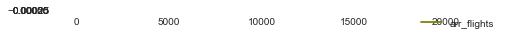

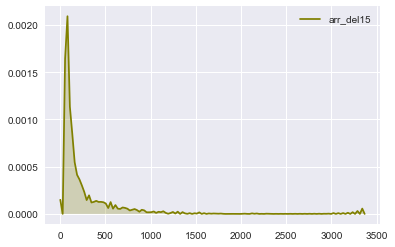

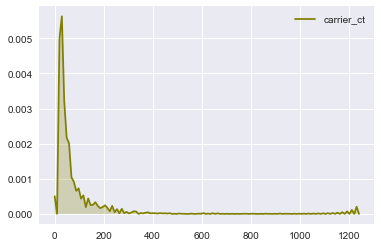

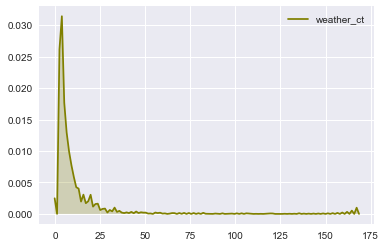

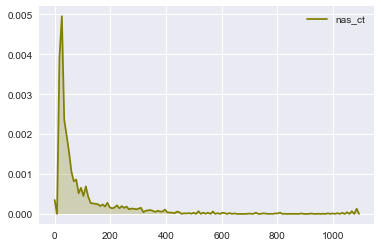

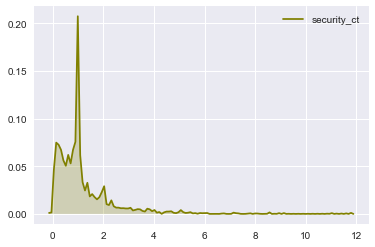

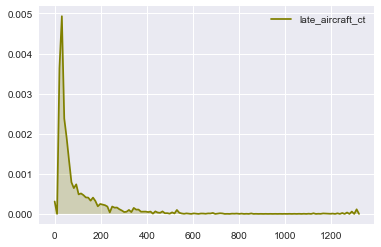

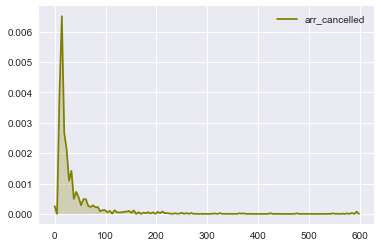

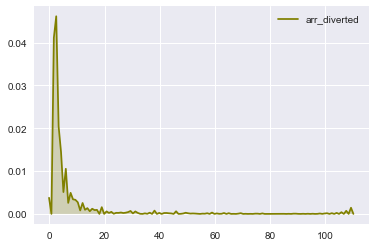

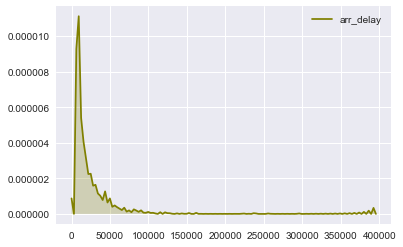

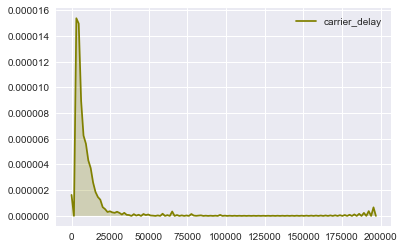

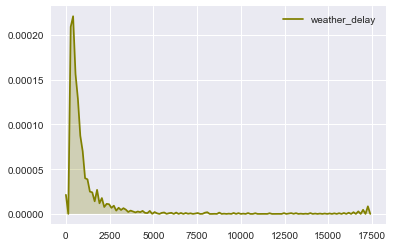

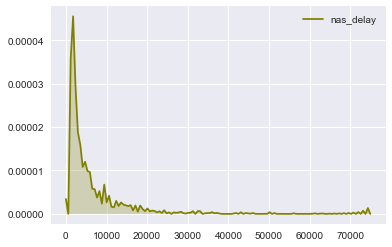

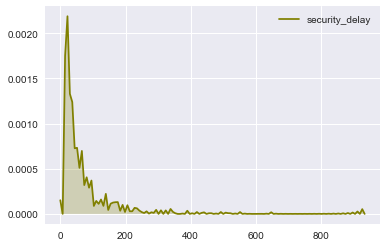

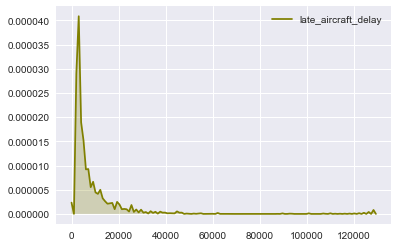

In [31]:
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
for dd in data2.columns[6:]:
    sns.kdeplot(data2[dd], shade=True, bw=.05, color="olive")
    plt.show()


In [20]:
data2.columns[6:]

Index([u'arr_flights', u'arr_del15', u'carrier_ct', u'weather_ct', u'nas_ct',
       u'security_ct', u'late_aircraft_ct', u'arr_cancelled', u'arr_diverted',
       u'arr_delay', u'carrier_delay', u'weather_delay', u'nas_delay',
       u'security_delay', u'late_aircraft_delay'],
      dtype='object')

In [27]:
data2.columns[6:]

Index([u'arr_flights', u'arr_del15', u'carrier_ct', u'weather_ct', u'nas_ct',
       u'security_ct', u'late_aircraft_ct', u'arr_cancelled', u'arr_diverted',
       u'arr_delay', u'carrier_delay', u'weather_delay', u'nas_delay',
       u'security_delay', u'late_aircraft_delay'],
      dtype='object')

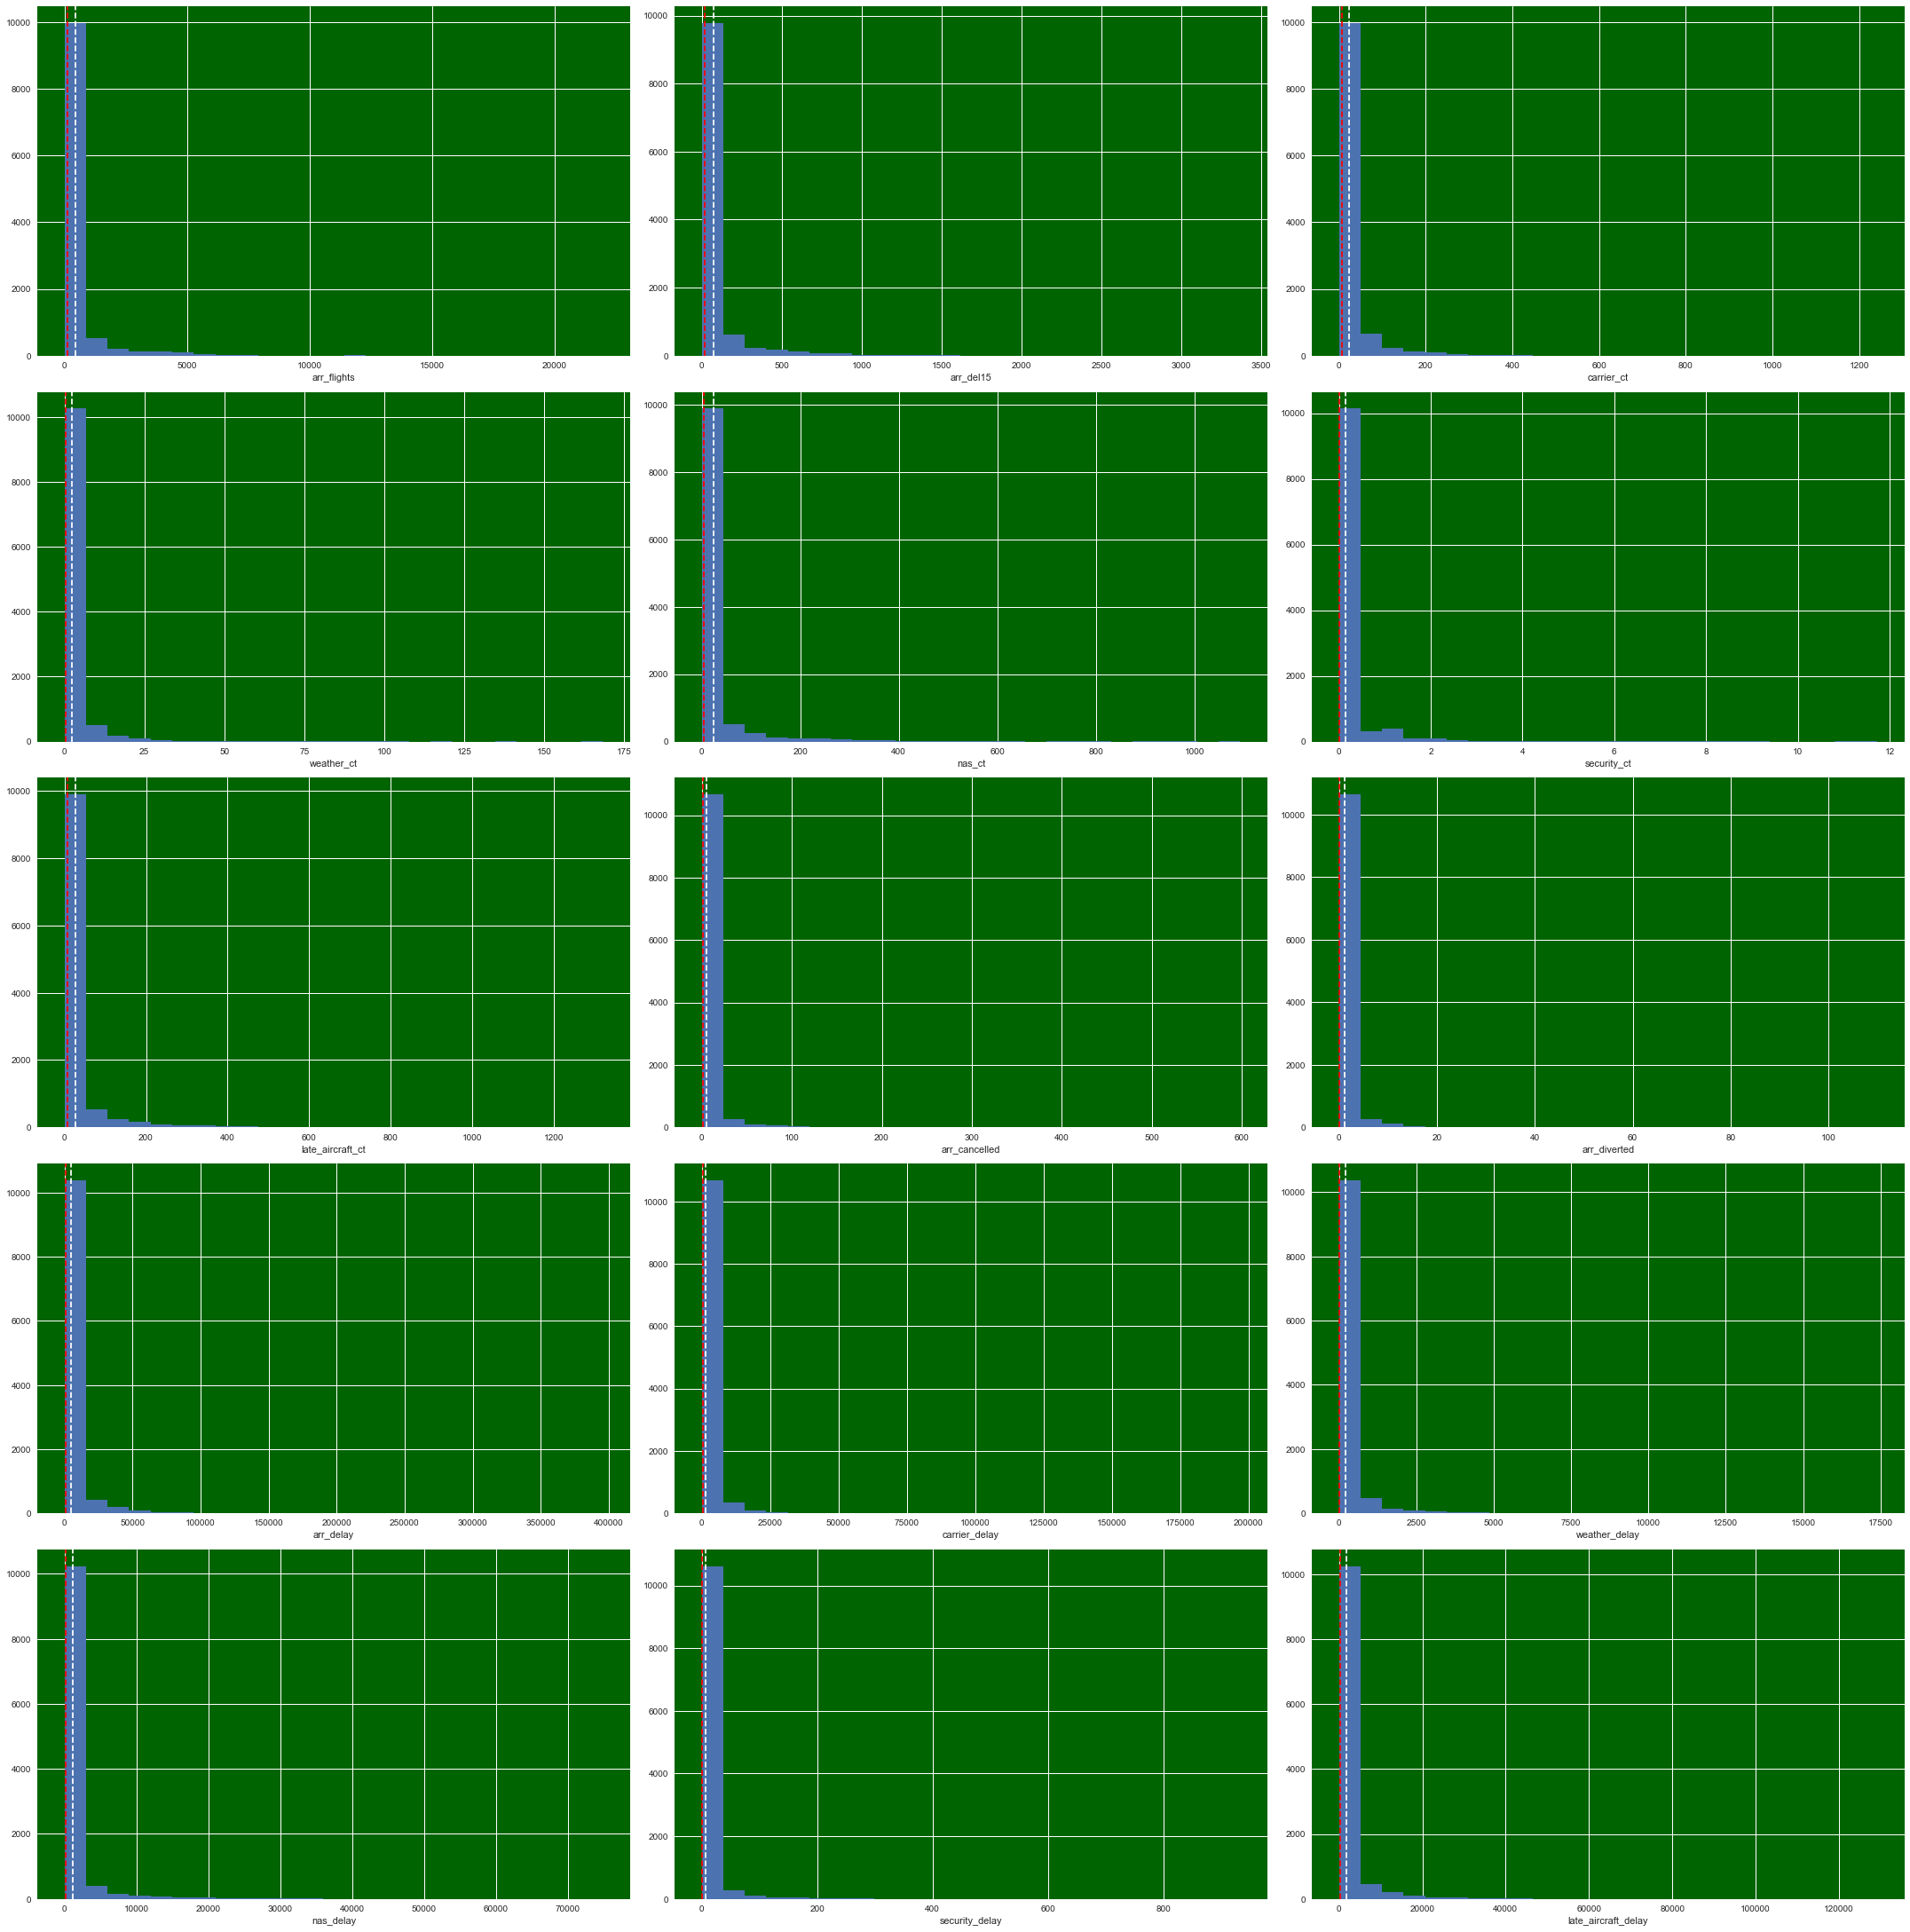

In [21]:
rows = len(data2.columns[6:])//2
fig = plt.figure(figsize=(30, 6*rows))

for i, col in enumerate(data2.columns[6:]):
    fig.add_subplot(rows, 3, i+1, facecolor='darkgreen')
    plt.axvline(np.mean(data2[col]), linestyle='--', color='w')
    plt.axvline((data2[col]).median(), linestyle='--', color='r')
    data2[col].hist(bins=25)
    plt.xlabel(col)
    plt.tight_layout()

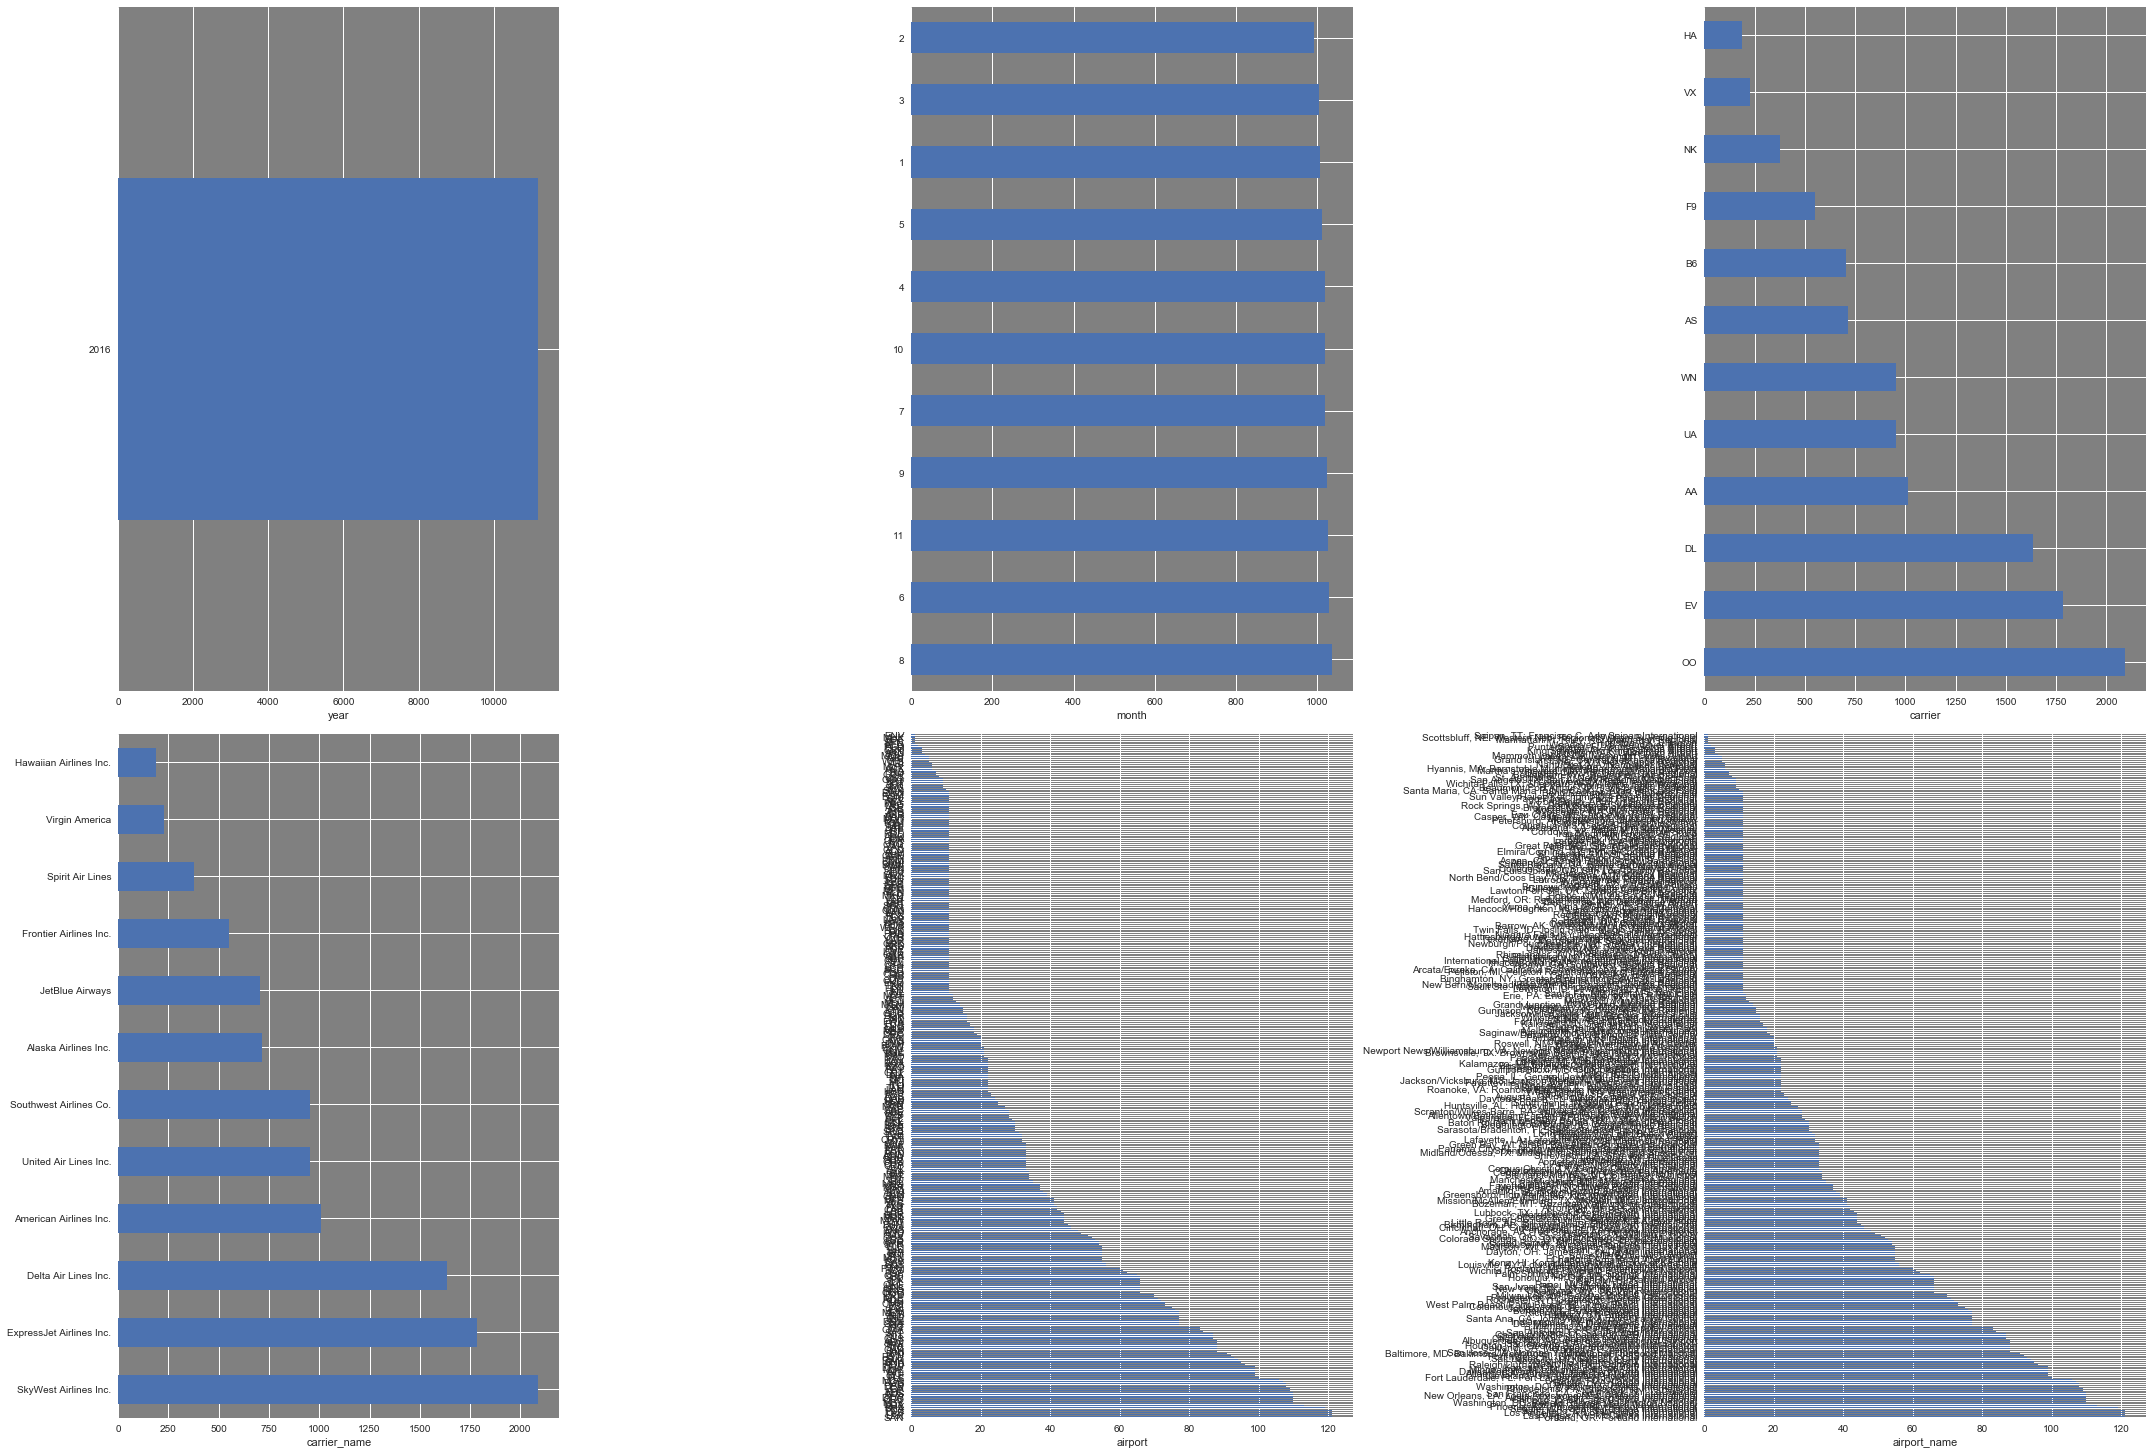

In [22]:
bar_rows = len(data2.columns[:6])//2
bar_fig = plt.figure(figsize=(30, 10*bar_rows))

for i, col in enumerate(data2.columns[:6]):
    bar_fig.add_subplot(bar_rows, 3, i+1, facecolor='grey')
    data2[col].value_counts().plot.barh()
    plt.xlabel(col)
    plt.tight_layout()

In [23]:
data2['arr_del15'].value_counts().nsmallest()

174.0     1
984.0     1
608.0     1
1090.0    1
479.0     1
Name: arr_del15, dtype: int64

In [24]:
data2['arr_del15'].isnull().value_counts()

False    11173
True        20
Name: arr_del15, dtype: int64

In [25]:
data2 = data2.dropna(axis=0)

In [26]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11173 entries, 0 to 11192
Data columns (total 21 columns):
year                   11173 non-null int64
month                  11173 non-null int64
carrier                11173 non-null object
carrier_name           11173 non-null object
airport                11173 non-null object
airport_name           11173 non-null object
arr_flights            11173 non-null float64
arr_del15              11173 non-null float64
carrier_ct             11173 non-null float64
weather_ct             11173 non-null float64
nas_ct                 11173 non-null float64
security_ct            11173 non-null float64
late_aircraft_ct       11173 non-null float64
arr_cancelled          11173 non-null float64
arr_diverted           11173 non-null float64
arr_delay              11173 non-null float64
carrier_delay          11173 non-null float64
weather_delay          11173 non-null float64
nas_delay              11173 non-null float64
security_delay         11

In [27]:
data2.corr()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,0.002763,-0.002961,-0.006135,-0.025285,0.000980,-0.024057,-0.001665,-0.083469,-0.009335,-0.002368,-0.001088,-0.030401,0.002159,0.002768,-0.002632
arr_flights,NaN,0.002763,1.000000,0.909238,0.918256,0.768739,0.804379,0.512487,0.881786,0.565827,0.636067,0.875205,0.876582,0.742316,0.697623,0.457597,0.852771
arr_del15,NaN,-0.002961,0.909238,1.000000,0.964600,0.834693,0.927291,0.585311,0.963148,0.640394,0.697848,0.968930,0.889905,0.809671,0.848995,0.545180,0.960491
carrier_ct,NaN,-0.006135,0.918256,0.964600,1.000000,0.819565,0.831446,0.575996,0.936909,0.620186,0.678039,0.942848,0.931457,0.796313,0.734375,0.536681,0.942444
weather_ct,NaN,-0.025285,0.768739,0.834693,0.819565,1.000000,0.747240,0.497817,0.789935,0.539500,0.710763,0.821846,0.755200,0.954521,0.693923,0.451133,0.798067
nas_ct,NaN,0.000980,0.804379,0.927291,0.831446,0.747240,1.000000,0.527607,0.810437,0.580871,0.626720,0.901002,0.771117,0.727642,0.949171,0.491155,0.830760
security_ct,NaN,-0.024057,0.512487,0.585311,0.575996,0.497817,0.527607,1.000000,0.563590,0.368564,0.405597,0.525674,0.475086,0.476423,0.435350,0.838333,0.537822
late_aircraft_ct,NaN,-0.001665,0.881786,0.963148,0.936909,0.789935,0.810437,0.563590,1.000000,0.626644,0.675512,0.924192,0.854865,0.764240,0.729300,0.527007,0.969846
arr_cancelled,NaN,-0.083469,0.565827,0.640394,0.620186,0.539500,0.580871,0.368564,0.626644,1.000000,0.480179,0.659195,0.609488,0.550791,0.587824,0.323593,0.642849


In [28]:
from sklearn import preprocessing

In [29]:
X_train = data2.iloc[:,6:]
X_scaled = preprocessing.scale(X_train)

X_scaled 

array([[ 9.81727955,  7.79026181,  9.49973709, ...,  3.46108131,
         5.14731096,  7.44308368],
       [ 0.10801396,  0.11212914,  0.23678165, ..., -0.13145947,
         0.30132808,  0.11277286],
       [ 0.12424162,  0.08004781,  0.25265697, ..., -0.11520118,
        -0.21215355, -0.02732412],
       ..., 
       [-0.18066758, -0.2086842 , -0.21066719, ..., -0.24526752,
        -0.21215355, -0.24878661],
       [ 1.30031998,  0.9622845 ,  1.23359497, ...,  0.14601539,
        -0.21215355,  0.73794098],
       [-0.39333534, -0.41186599, -0.44350523, ..., -0.30894584,
        -0.21215355, -0.36195687]])

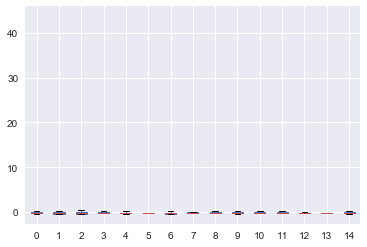

In [30]:
pd.DataFrame(X_scaled).plot.box()


In [31]:
# box_rows = len(data2.columns[6:])
# fig = plt.figure(figsize=(20, 5*box_rows))

# for i, col in enumerate(data2.columns[6:]):
#     fig.add_subplot(box_rows, 4, i+1)
#     pd.DataFrame(X_train).plot.box()
#     plt.xlabel(col)

In [32]:
data3 = pd.read_csv('./project_datasets/682464398_102017_1651_airline_delay_causes.csv', skipinitialspace=True)


In [33]:
data3.columns

Index([u'year', u' month', u'carrier', u'carrier_name', u'airport',
       u'airport_name', u'arr_flights', u'arr_del15', u'carrier_ct',
       u' weather_ct', u'nas_ct', u'security_ct', u'late_aircraft_ct',
       u'arr_cancelled', u'arr_diverted', u' arr_delay', u' carrier_delay',
       u'weather_delay', u'nas_delay', u'security_delay',
       u'late_aircraft_delay', u'Unnamed: 21'],
      dtype='object')

In [34]:
data2[['arr_del15']].head()

,arr_del15
0,1534.0
1,98.0
2,92.0
3,335.0
4,59.0


In [35]:
data2[['arr_del15']].describe()

,arr_del15
count,11173.000000
mean,77.029088
std,187.033010
min,0.000000
25%,8.000000
50%,21.000000
75%,56.000000
max,3368.000000


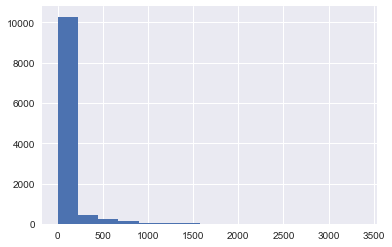

In [36]:
data2['arr_del15'].hist(bins=15)

In [37]:
delayed = data2['arr_del15'] > 15

In [38]:
full_airports = data2.airport_name.unique()
full_airports

array(['Dallas/Fort Worth, TX: Dallas/Fort Worth International',
       'Detroit, MI: Detroit Metro Wayne County',
       'Seattle, WA: Seattle/Tacoma International',
       'New York, NY: John F. Kennedy International',
       'San Jose, CA: Norman Y. Mineta San Jose International',
       "Chicago, IL: Chicago O'Hare International",
       'Phoenix, AZ: Phoenix Sky Harbor International',
       'St. Louis, MO: St Louis Lambert International',
       'Los Angeles, CA: Los Angeles International',
       'Orlando, FL: Orlando International',
       'Denver, CO: Denver International',
       'Miami, FL: Miami International',
       'Kona, HI: Kona International Airport at Keahole',
       'Houston, TX: George Bush Intercontinental/Houston',
       'Austin, TX: Austin - Bergstrom International',
       'Las Vegas, NV: McCarran International',
       'Salt Lake City, UT: Salt Lake City International',
       'Tucson, AZ: Tucson International',
       'Charlotte Amalie, VI: Cyril E King',
 

We need all the unique airports so we can loop through them and get their geolocation

In [39]:
airports = data2.airport_name.unique()
airports[0:10]

array(['Dallas/Fort Worth, TX: Dallas/Fort Worth International',
       'Detroit, MI: Detroit Metro Wayne County',
       'Seattle, WA: Seattle/Tacoma International',
       'New York, NY: John F. Kennedy International',
       'San Jose, CA: Norman Y. Mineta San Jose International',
       "Chicago, IL: Chicago O'Hare International",
       'Phoenix, AZ: Phoenix Sky Harbor International',
       'St. Louis, MO: St Louis Lambert International',
       'Los Angeles, CA: Los Angeles International',
       'Orlando, FL: Orlando International'], dtype=object)

In [40]:
from pygeocoder import Geocoder
from mpl_toolkits.basemap import Basemap

In [41]:
def get_airport_code(airport_name):
    """function takes in a loosely typed name of city and or airport and 
    returns the airports' three digit code, full name, and coordinates
    It's good to specify the airport if a city has two, such as Dallas Love Field
    and Dallas Fort Worth """
    g = Geocoder.geocode(airport_name)
    proto_code = g.formatted_address.encode('utf-8')    
    airport_code = re.search('\(([^)]+)', proto_code).group(1)
    return [airport_code, str(g.airport), g.coordinates]

In [45]:
get_airport_code("Ronald Reagan International Airport")

GeocoderError: Error OVER_QUERY_LIMIT
Query: https://maps.google.com/maps/api/geocode/json?region=&sensor=false&bounds=&language=&address=Ronald+Reagan+International+Airport

In [150]:
full_airports = list(full_airports)
full_airports[0:10]

['Dallas/Fort Worth, TX: Dallas/Fort Worth International',
 'Detroit, MI: Detroit Metro Wayne County',
 'Seattle, WA: Seattle/Tacoma International',
 'New York, NY: John F. Kennedy International',
 'San Jose, CA: Norman Y. Mineta San Jose International',
 "Chicago, IL: Chicago O'Hare International",
 'Phoenix, AZ: Phoenix Sky Harbor International',
 'St. Louis, MO: St Louis Lambert International',
 'Los Angeles, CA: Los Angeles International',
 'Orlando, FL: Orlando International']

In [151]:
# match two capital letters
# ^[A-Z]{2}$

In [152]:
# expression = full_airports[0]
# expression.re(^[A-Z]{2}$)

In [153]:
full_airports_good = []
for good_string in full_airports:
    good_string = good_string.replace("'", '"')
    full_airports_good.append(good_string)
full_airports_good

['Dallas/Fort Worth, TX: Dallas/Fort Worth International',
 'Detroit, MI: Detroit Metro Wayne County',
 'Seattle, WA: Seattle/Tacoma International',
 'New York, NY: John F. Kennedy International',
 'San Jose, CA: Norman Y. Mineta San Jose International',
 'Chicago, IL: Chicago O"Hare International',
 'Phoenix, AZ: Phoenix Sky Harbor International',
 'St. Louis, MO: St Louis Lambert International',
 'Los Angeles, CA: Los Angeles International',
 'Orlando, FL: Orlando International',
 'Denver, CO: Denver International',
 'Miami, FL: Miami International',
 'Kona, HI: Kona International Airport at Keahole',
 'Houston, TX: George Bush Intercontinental/Houston',
 'Austin, TX: Austin - Bergstrom International',
 'Las Vegas, NV: McCarran International',
 'Salt Lake City, UT: Salt Lake City International',
 'Tucson, AZ: Tucson International',
 'Charlotte Amalie, VI: Cyril E King',
 'Boston, MA: Logan International',
 'Fort Lauderdale, FL: Fort Lauderdale-Hollywood International',
 'San Francisc

In [173]:
short1 = full_airports_good[0:10]

In [177]:
for full_port in short1:
    try:
        print (get_airport_code(full_port))
    except:
        print (full_port)

Dallas/Fort Worth, TX: Dallas/Fort Worth International
Detroit, MI: Detroit Metro Wayne County
Seattle, WA: Seattle/Tacoma International
New York, NY: John F. Kennedy International
San Jose, CA: Norman Y. Mineta San Jose International
Chicago, IL: Chicago O"Hare International
Phoenix, AZ: Phoenix Sky Harbor International
St. Louis, MO: St Louis Lambert International
Los Angeles, CA: Los Angeles International
Orlando, FL: Orlando International


In [197]:
# this one seems to have fixed the O'hare double quote problem'
for full_port in full_airports_good:
    try:
        print (get_airport_code(full_port))
    except:
        error_list = full_port.replace("\"", '\'')
        print error_list

Dallas/Fort Worth, TX: Dallas/Fort Worth International
Detroit, MI: Detroit Metro Wayne County
Seattle, WA: Seattle/Tacoma International
New York, NY: John F. Kennedy International
San Jose, CA: Norman Y. Mineta San Jose International
Chicago, IL: Chicago O'Hare International
Phoenix, AZ: Phoenix Sky Harbor International
St. Louis, MO: St Louis Lambert International
Los Angeles, CA: Los Angeles International
Orlando, FL: Orlando International
Denver, CO: Denver International
Miami, FL: Miami International
Kona, HI: Kona International Airport at Keahole
Houston, TX: George Bush Intercontinental/Houston
Austin, TX: Austin - Bergstrom International
Las Vegas, NV: McCarran International
Salt Lake City, UT: Salt Lake City International
Tucson, AZ: Tucson International
Charlotte Amalie, VI: Cyril E King
Boston, MA: Logan International
Fort Lauderdale, FL: Fort Lauderdale-Hollywood International
San Francisco, CA: San Francisco International
Kahului, HI: Kahului Airport
Tampa, FL: Tampa Inter

Traverse City, MI: Cherry Capital
Erie, PA: Erie International/Tom Ridge Field
Cedar Rapids/Iowa City, IA: The Eastern Iowa
College Station/Bryan, TX: Easterwood Field
Lansing, MI: Capital Region International
Hobbs, NM: Lea County Regional
Lake Charles, LA: Lake Charles Regional
Amarillo, TX: Rick Husband Amarillo International
South Bend, IN: South Bend International
Lincoln, NE: Lincoln Airport
Corpus Christi, TX: Corpus Christi International
Harlingen/San Benito, TX: Valley International
State College, PA: University Park
Grand Junction, CO: Grand Junction Regional
Mosinee, WI: Central Wisconsin
Jacksonville/Camp Lejeune, NC: Albert J Ellis
Elmira/Corning, NY: Elmira/Corning Regional
Valdosta, GA: Valdosta Regional
Montgomery, AL: Montgomery Regional
Bangor, ME: Bangor International
Rochester, MN: Rochester International
Rapid City, SD: Rapid City Regional
Columbus, MS: Golden Triangle Regional
Columbus, GA: Columbus Airport
Brunswick, GA: Brunswick Golden Isles
Dothan, AL: Dothan 